In [16]:
# importera en dataset från sklearn
# vi väljer att importera breast cancer dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
sleep_time = 0.5

import database as DB
import EDA as Eda

In [ ]:
DB.create_directory()

DATABASE

In [ ]:
# ladda in datasetet
print("\nLaddar in datasetet...\n")
db = DB.set_db()
time.sleep(sleep_time)
print("Datasetet är laddat.\n")
time.sleep(sleep_time)

print("Skapar en dataframe...\n")
df = DB.set_df(db)
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe(), "\n")
time.sleep(sleep_time)

time.sleep(sleep_time)
print("Datasetet är laddat.\n")

EDA

Correlation matrix is saved in the file correlation_matrix.png
Feature distribution is saved in the file feature_distribution.png
['area error' 'mean area' 'mean concave points' 'mean concavity'
 'mean perimeter' 'mean radius' 'mean texture' 'perimeter error'
 'radius error' 'worst area' 'worst concave points' 'worst perimeter'
 'worst radius' 'worst texture']
Boxplots are saved in the files EDA


AttributeError: 'EDA' object has no attribute 'plot_pairplot'

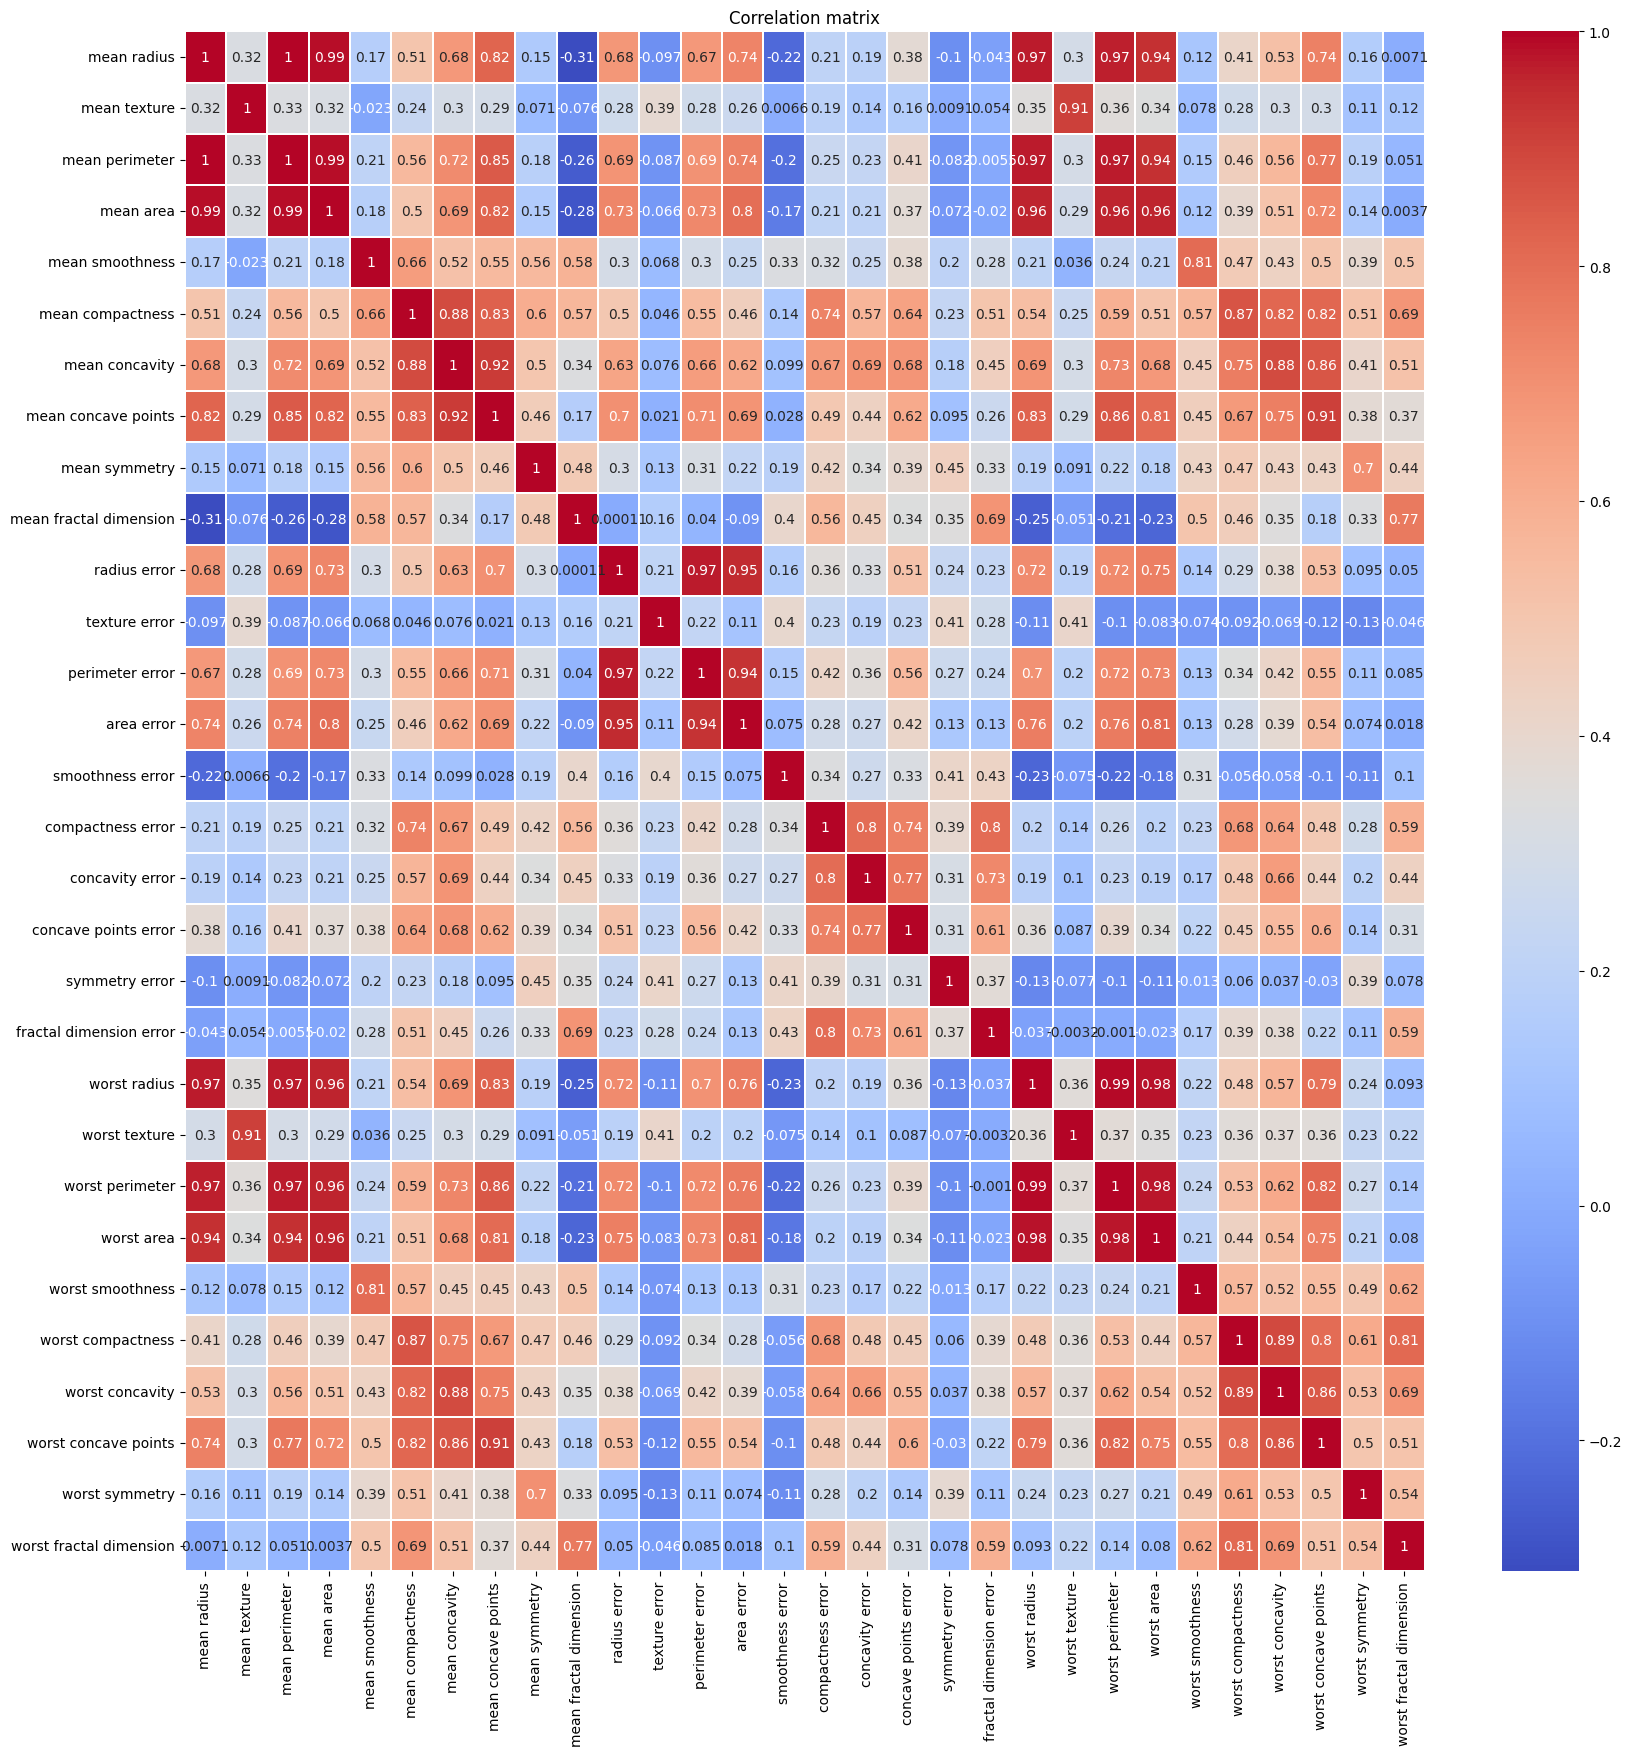

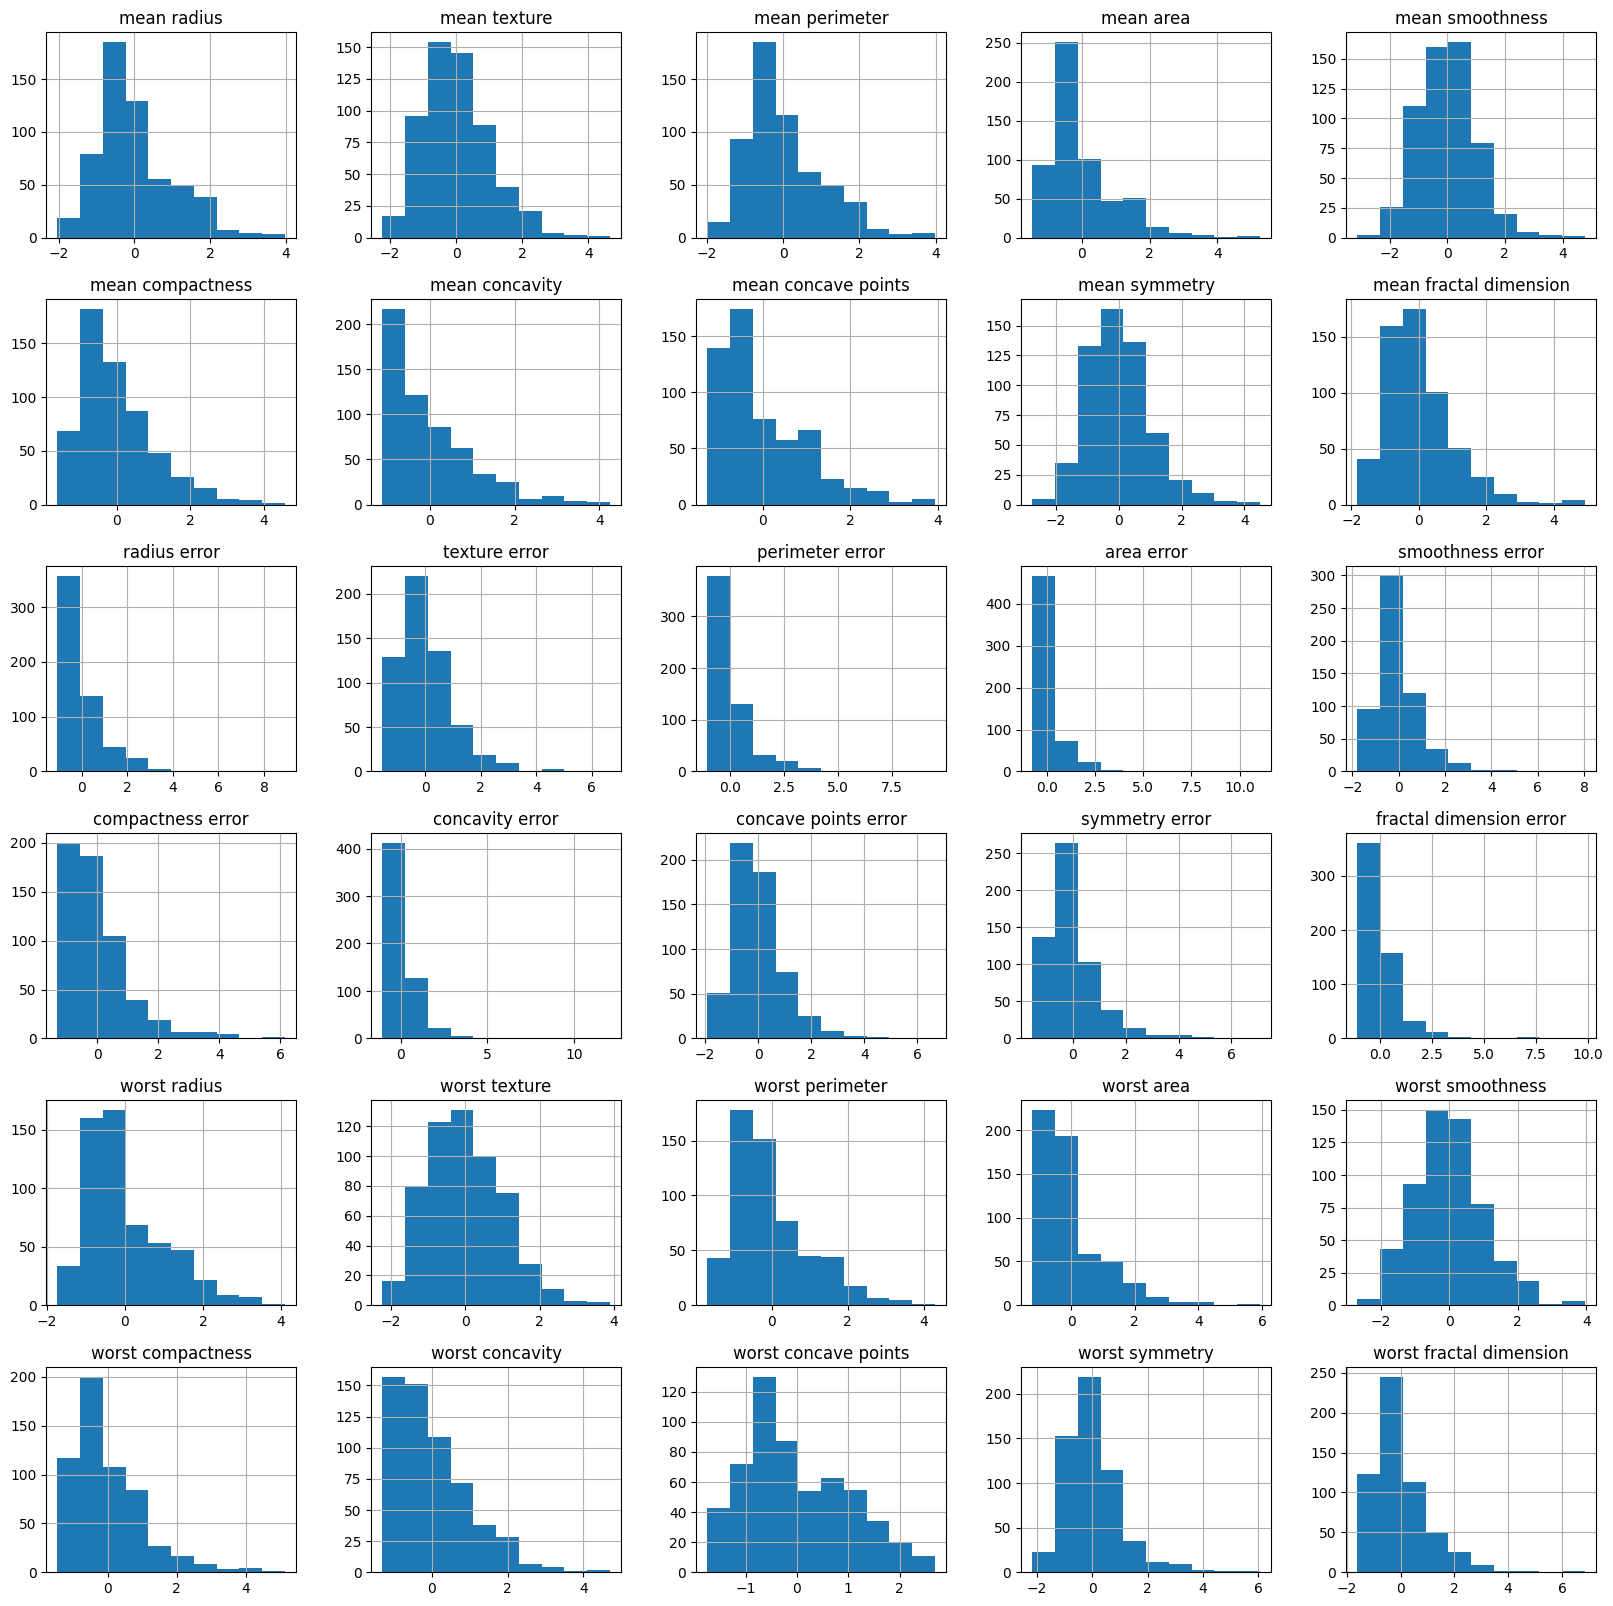

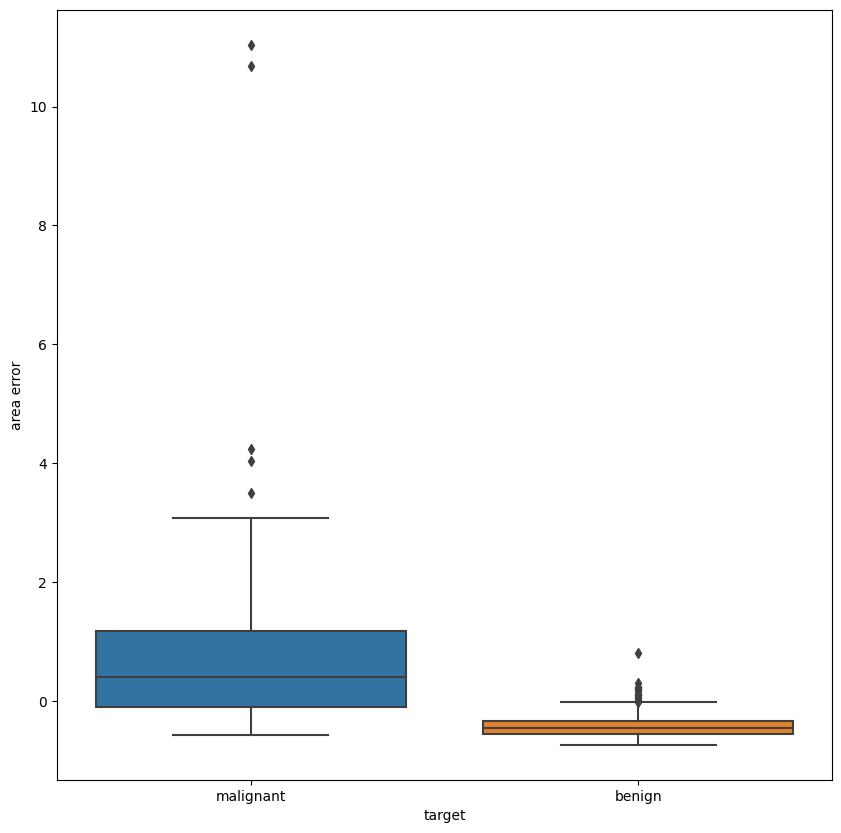

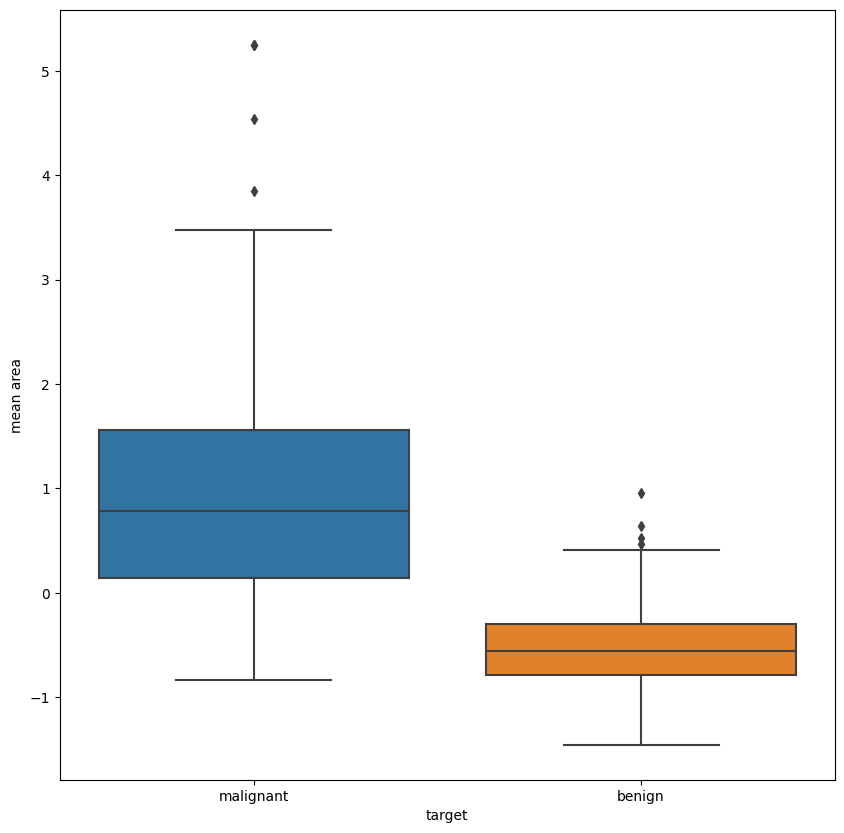

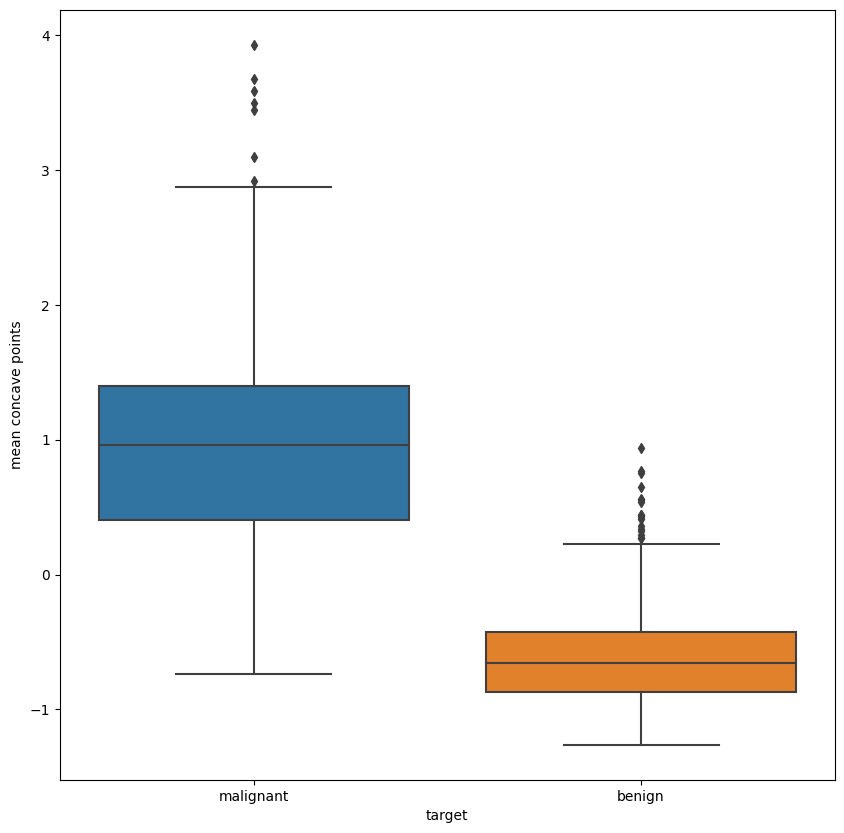

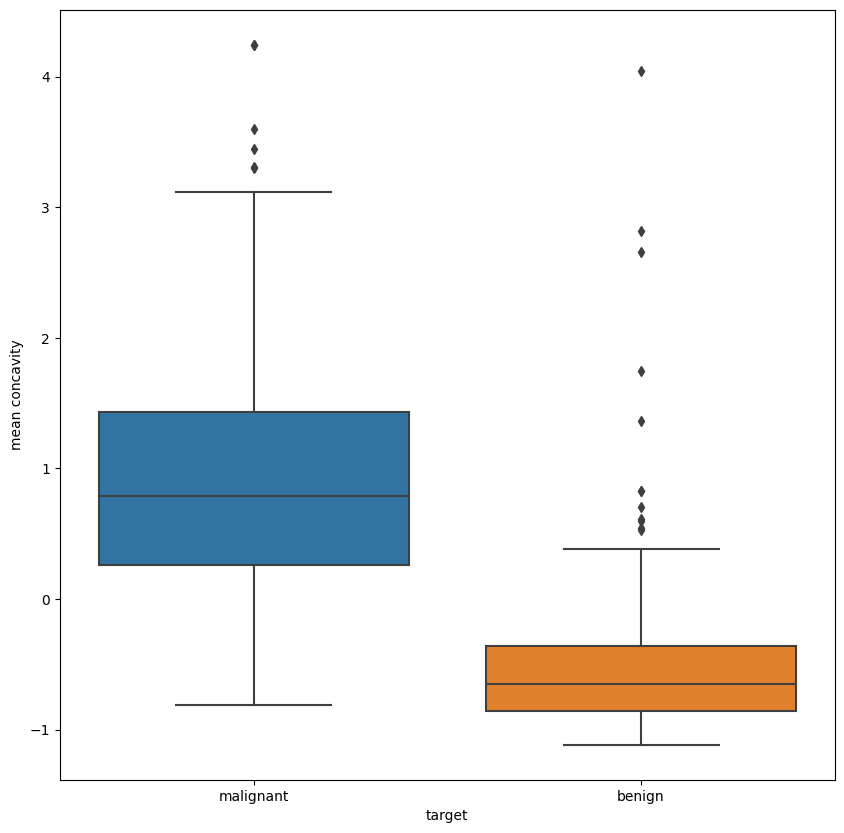

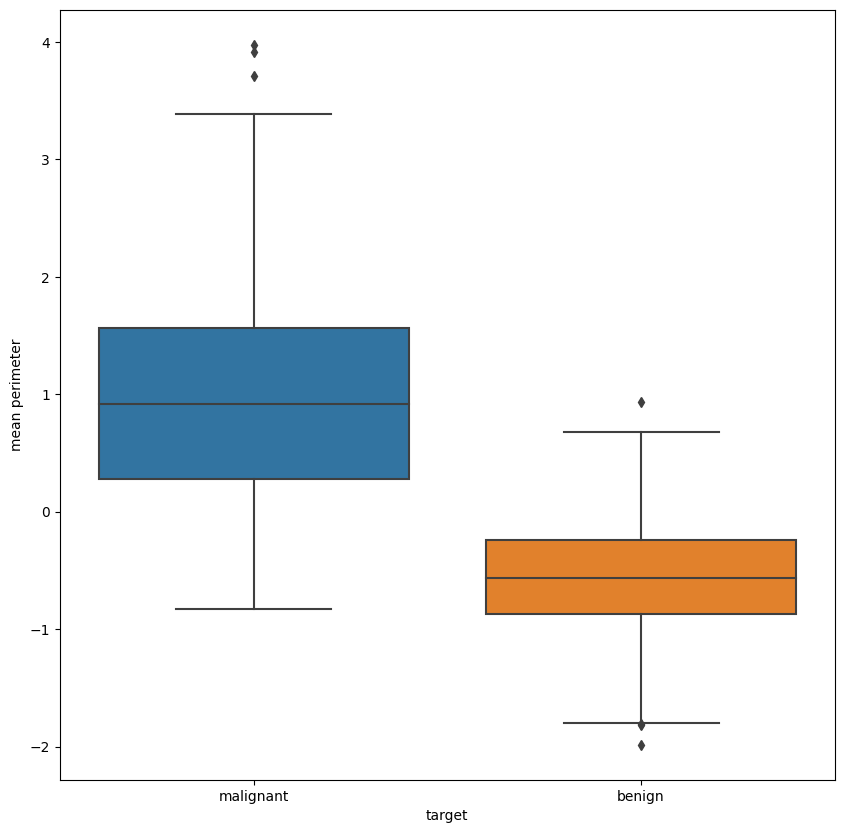

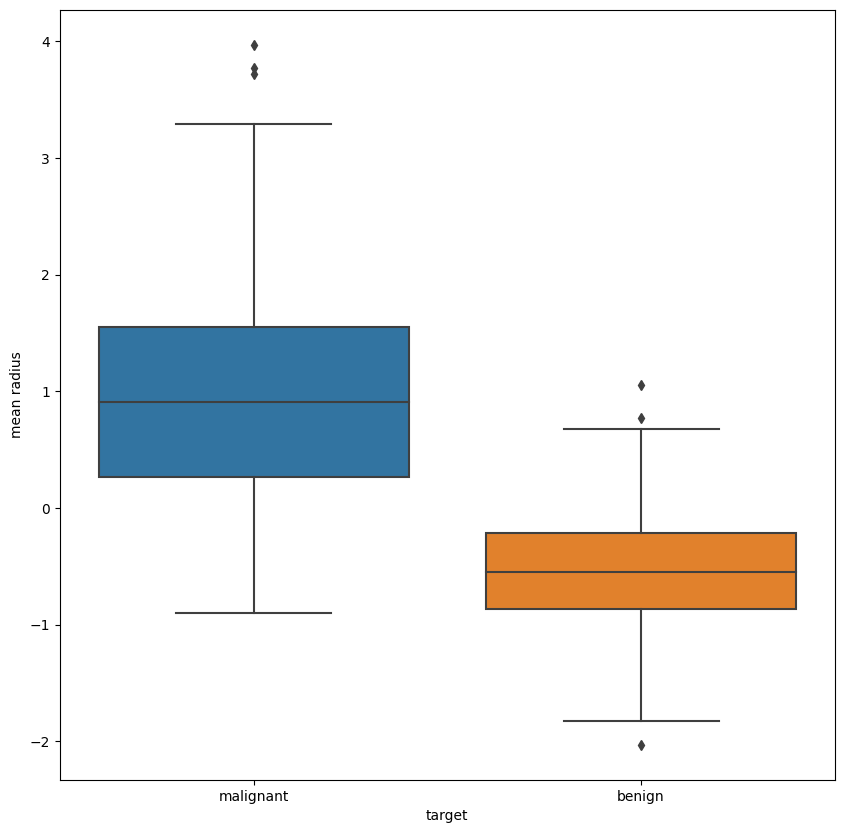

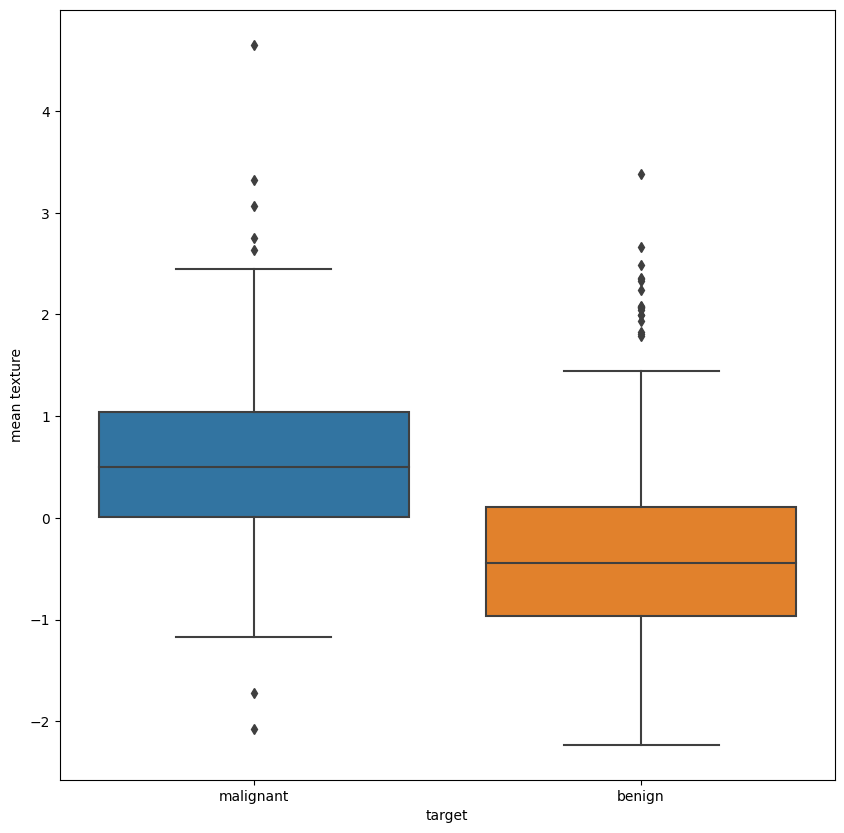

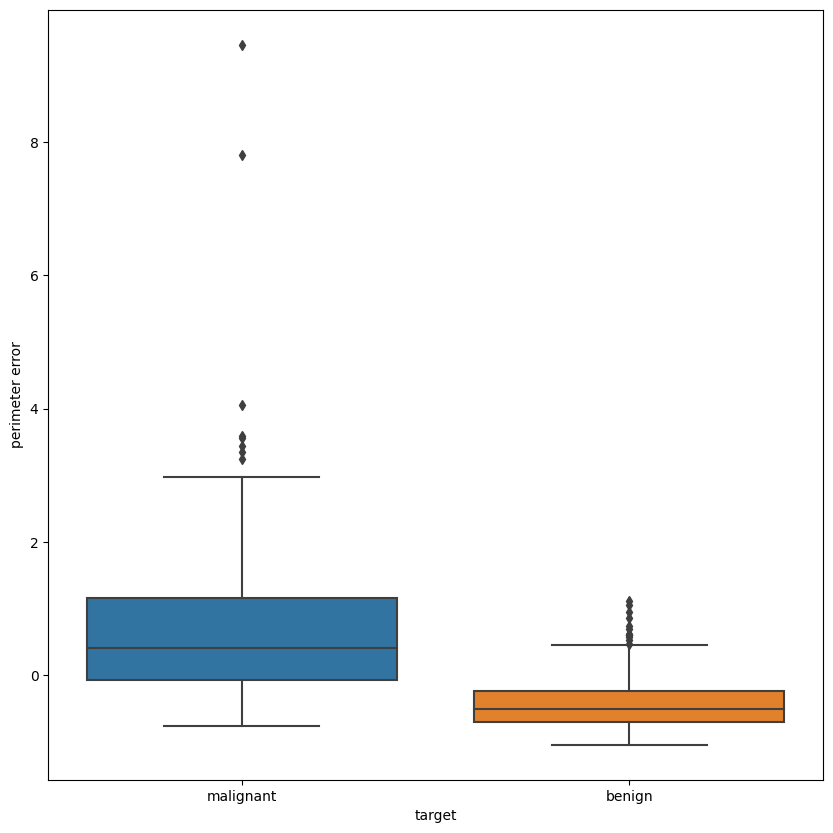

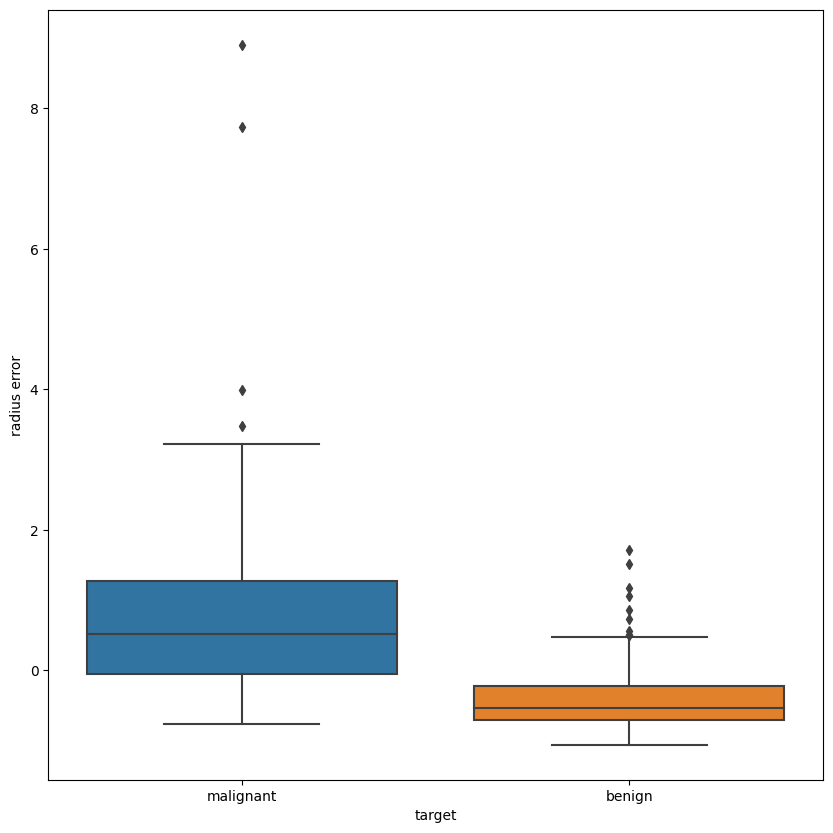

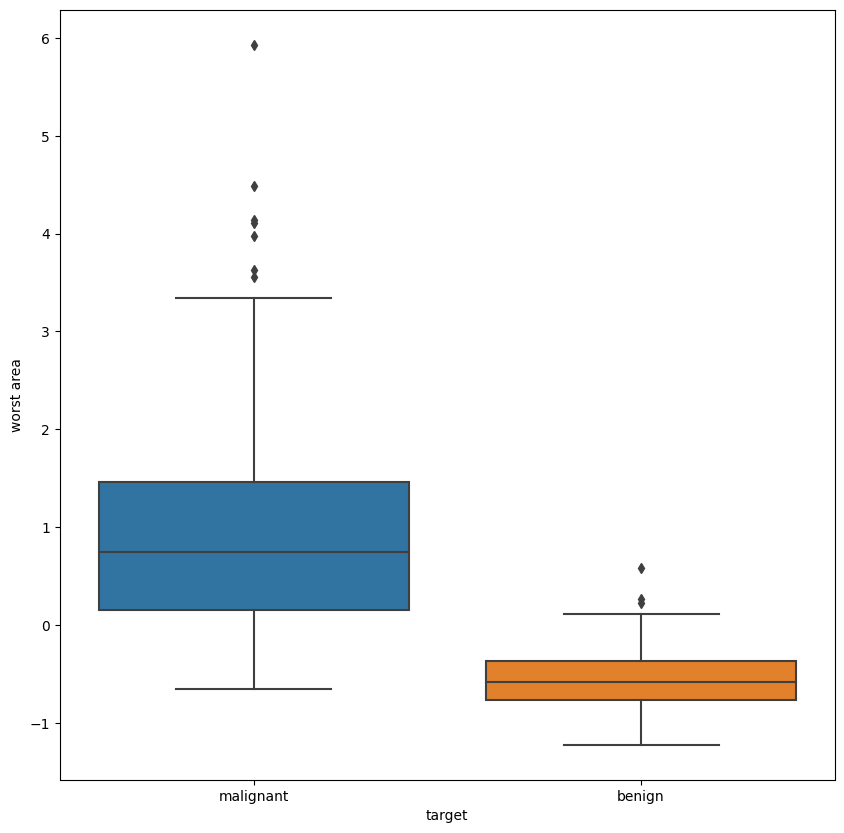

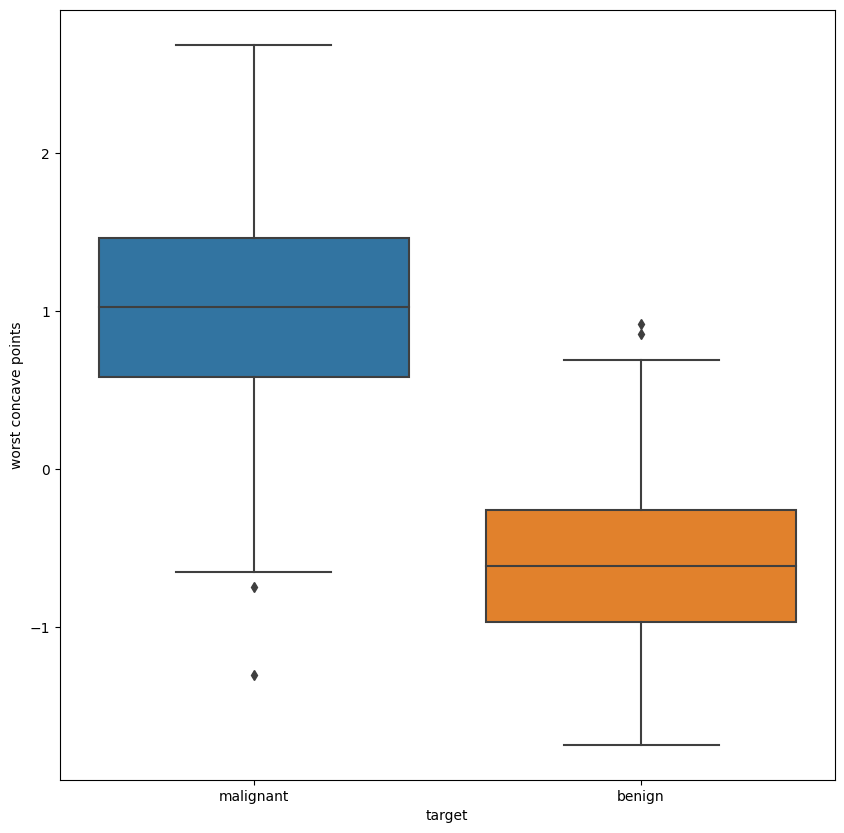

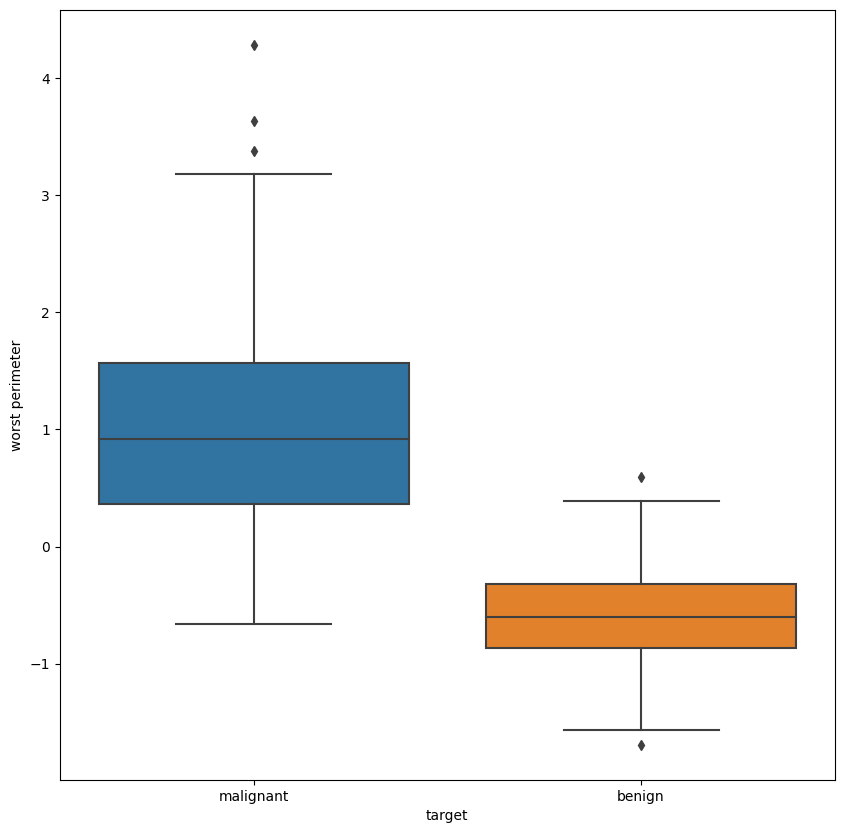

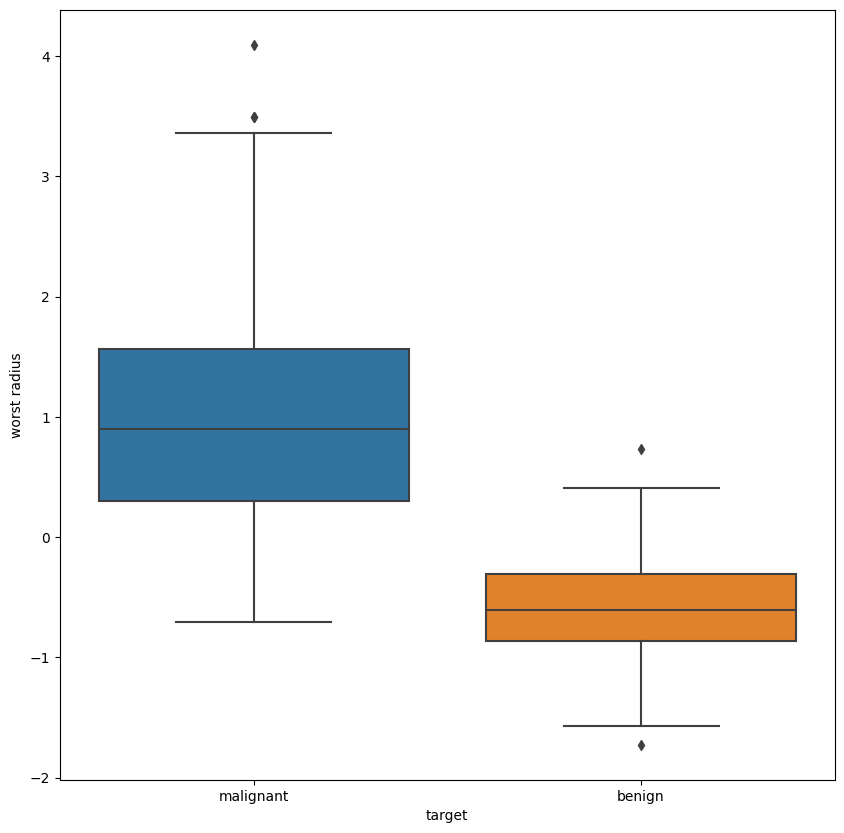

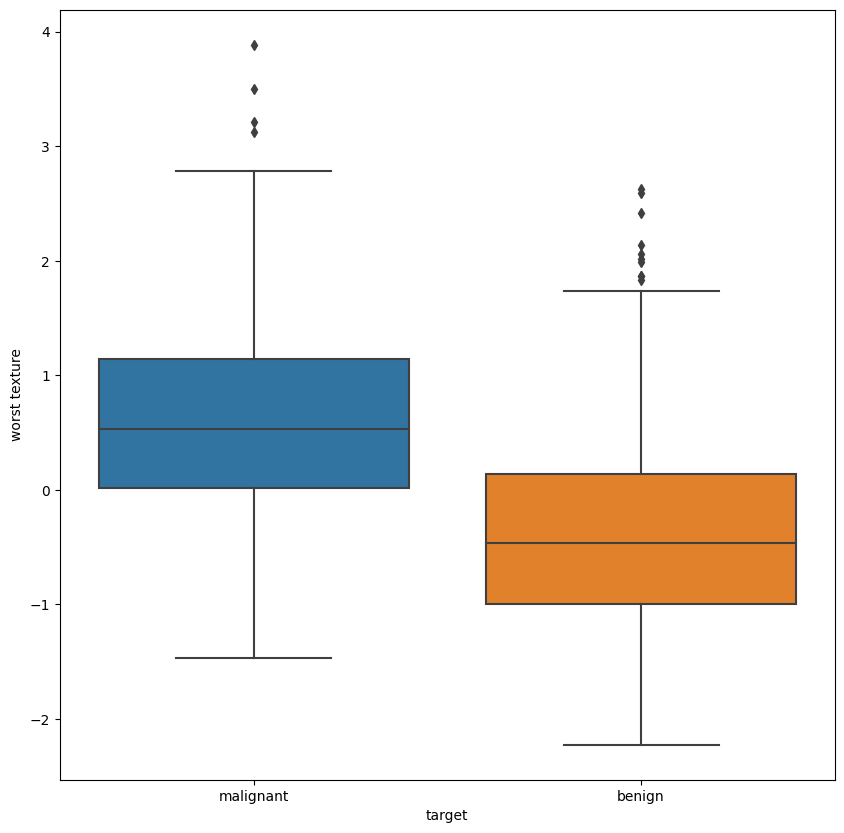

In [17]:
eda = Eda.EDA(df)
print(eda.plot_correlation_matrix())
print(eda.plot_feature_distribution())
print(eda.define_best_features(0.9))
print(eda.plot_boxplot())
print(eda.plot_pairplot())

ML

In [ ]:
# träna en modell
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X = df_cancer[temp]
y = df_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", lin_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X, y, cv = 5)
print("Accuratezza della cross validation: ", scores)
print("Accuratezza media della cross validation: ", scores.mean())

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("\n")
print("GRIDSEARCH")
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.best_score_))

random_search = RandomizedSearchCV(Ridge(), param_grid, n_iter=5, cv=5)
random_search.fit(X_train, y_train)

print("\n")
print("RANDOMSEARCH")
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Best estimator:\n{}".format(random_search.best_estimator_))
print("Test set score: {:.2f}".format(random_search.best_score_))




In [ ]:
ridge_model = Ridge(alpha=grid_search.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", ridge_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)
rm = ridge_model.score(X_test, y_test)
diff = r2 - rm
print("Difference: %.2f" % diff)



In [ ]:
param_grid = {"alpha": [ 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

print("\n")
print("GRIDSEARCH")
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))
print("Test set score: {:.2f}".format(grid_search.best_score_))

random_search = RandomizedSearchCV(Lasso(), param_grid, n_iter=10, cv=10)
random_search.fit(X_train, y_train)

print("\n")
print("RANDOMSEARCH")
print("Best parameters: {}".format(random_search.best_params_))
print("Best cross-validation score: {:.2f}".format(random_search.best_score_))
print("Best estimator:\n{}".format(random_search.best_estimator_))
print("Test set score: {:.2f}".format(random_search.best_score_))


In [ ]:
lasso_model = Lasso(alpha=grid_search.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

y_pred = lasso_model.predict(X_test)

# printa ut resultatet
print("Coefficients: \n", lasso_model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Coefficient of determination: %.2f" % r2)
rm = lasso_model.score(X_test, y_test)
diff = r2 - rm
print("Difference: %.2f" % diff)
